In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
path = r'C:\Users\kanch\OneDrive\Naresh IT\Data science\data files\Visadataset.csv'
visa_df = pd.read_csv(path)
visa_df.head(10)

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified
5,EZYV06,Asia,Master's,Y,N,2339,2012,South,78252.1400,Year,Y,Certified
6,EZYV07,Asia,Bachelor's,N,N,4985,1994,South,53635.3900,Year,Y,Certified
7,EZYV08,North America,Bachelor's,Y,N,3035,1924,West,418.2298,Hour,Y,Denied
8,EZYV09,Asia,Bachelor's,N,N,4810,2012,Midwest,74362.1900,Year,Y,Certified
9,EZYV10,Europe,Doctorate,Y,N,2251,1995,South,67514.7600,Year,Y,Certified


In [3]:
visa_df.shape

(25480, 12)

In [4]:
visa_df.describe()

,no_of_employees,yr_of_estab,prevailing_wage
count,25480.000000,25480.000000,25480.000000
mean,5667.043210,1979.409929,74455.814592
std,22877.928848,42.366929,52815.942327
min,-26.000000,1800.000000,2.136700
25%,1022.000000,1976.000000,34015.480000
50%,2109.000000,1997.000000,70308.210000
75%,3504.000000,2005.000000,107735.512500
max,602069.000000,2016.000000,319210.270000


**Steps in  Outlier analysis**
- step-1:   Find the Q1, Q2  and Q3
    - np.precentile(column data, q)
    
- step-2:  calculate the IQR
    - IQR = Q3-Q1
- step-3: Calculate lower  boundary and upper boundary
    - lb: Q1-1.5IQR
    - ub: Q3+1.5IQR
- step-4: Find the Outliersdf
    - c1: column data<lb
                   
    - c2:column data >up
    - c: apply the  main condition
    - main data(c)

In [48]:
# step-1: Find the Q1, Q2 and Q3
Q1 = np.percentile(visa_df['prevailing_wage'],25)
Q2 = np.percentile(visa_df['prevailing_wage'],50)
Q3 = np.percentile(visa_df['prevailing_wage'],75)

# step-2: 
IQR = Q3-Q1

############
lb = Q1-1.5*IQR
ub = Q3+1.5*IQR

########## ouliers count #########
c1 = visa_df['prevailing_wage']>lb
c2 = visa_df['prevailing_wage']<ub
con1 = c1|c2
#######################
outliers_df = visa_df[con]
outliers_df
##################
c1 = visa_df['prevailing_wage']>=lb
c2 = visa_df['prevailing_wage']<ub
con2 = c1|c2

non_outliers_df=visa_df[c1&c2]

non_outliers_df

#############################################
median= visa_df['prevailing_wage'].median()

list1 = []
for i in visa_df['prevailing_wage']:
    if i<lb or i>ub:
        list1.append(median)
    else: 
        list1.append(i)
        
visa_df['prevailing_wage']=list1

            

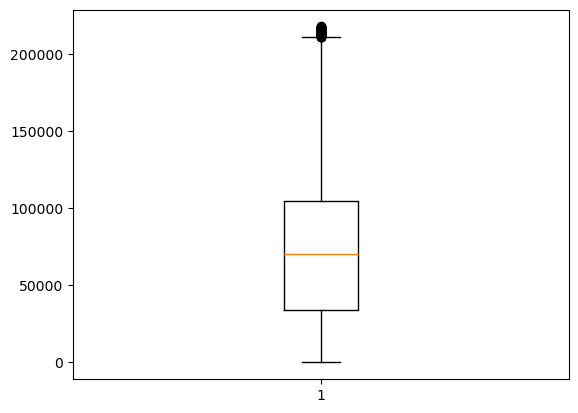

In [46]:
plt.boxplot(visa_df['prevailing_wage'])
plt.show()

In [50]:
visa_df[con2]

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified
...,...,...,...,...,...,...,...,...,...,...,...,...
25475,EZYV25476,Asia,Bachelor's,Y,Y,2601,2008,South,77092.5700,Year,Y,Certified
25476,EZYV25477,Asia,High School,Y,N,3274,2006,Northeast,70308.2100,Year,Y,Certified
25477,EZYV25478,Asia,Master's,Y,N,1121,1910,South,146298.8500,Year,N,Certified
25478,EZYV25479,Asia,Master's,Y,Y,1918,1887,West,86154.7700,Year,Y,Certified


In [6]:
len(visa_df[con])

25480

In [7]:
outliers_df

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
14,EZYV15,Asia,Master's,Y,Y,15756,2006,South,220081.73,Year,Y,Certified
34,EZYV35,Asia,Master's,N,N,1809,2010,South,225569.73,Year,N,Certified
130,EZYV131,South America,High School,N,N,2554,2005,Midwest,247393.01,Year,Y,Certified
216,EZYV217,Asia,Master's,Y,N,1515,2001,Midwest,269321.68,Year,N,Certified
221,EZYV222,North America,Doctorate,Y,Y,2518,2010,South,219529.62,Year,Y,Certified
...,...,...,...,...,...,...,...,...,...,...,...,...
25191,EZYV25192,Asia,Master's,N,N,4983,2005,Midwest,280482.51,Year,Y,Denied
25195,EZYV25196,North America,Master's,Y,N,47,2001,South,234308.77,Year,N,Certified
25468,EZYV25469,Asia,Bachelor's,N,N,373,2005,Midwest,272715.74,Year,N,Certified
25469,EZYV25470,North America,Master's,Y,N,2261,1997,Northeast,273772.47,Year,N,Certified


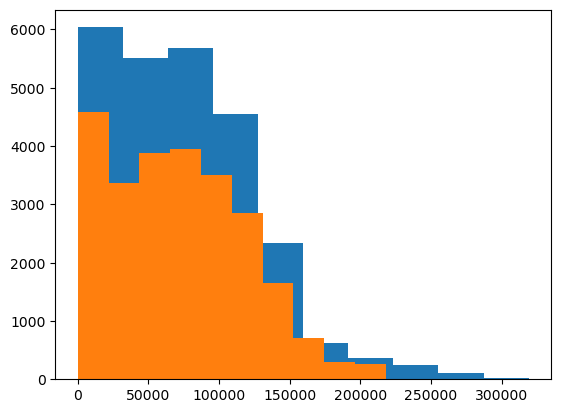

In [8]:
plt.hist(visa_df['prevailing_wage'])
plt.hist(non_outliers_df['prevailing_wage'])
plt.show()

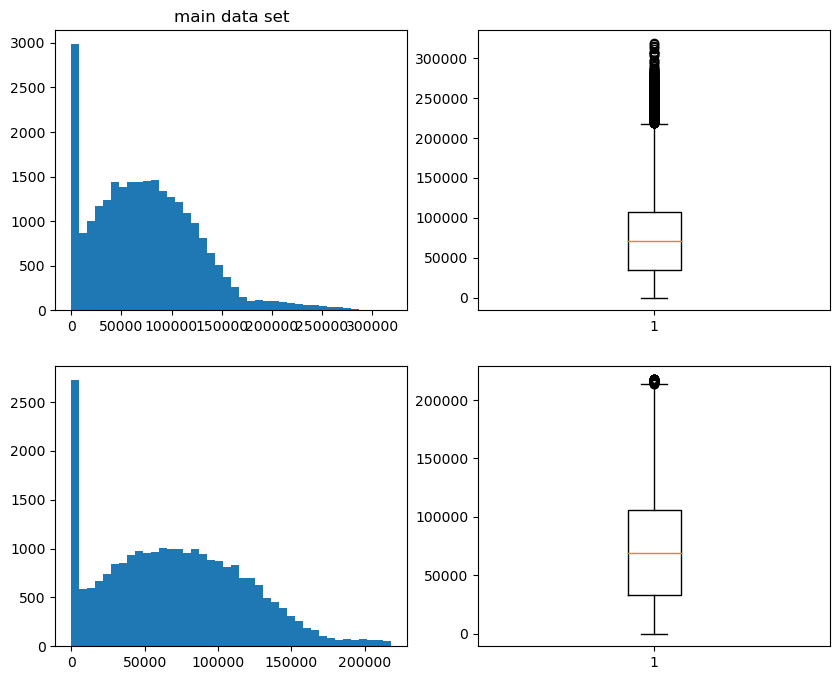

In [9]:
plt.figure(figsize=(10,8))
plt.subplot(2,2,1)
plt.hist(visa_df['prevailing_wage'],40)
plt.title('main data set')
plt.subplot(2,2,2)
plt.boxplot(visa_df['prevailing_wage'])

plt.subplot(2,2,3)
plt.hist(non_outliers_df['prevailing_wage'],40)

plt.subplot(2,2,4)
plt.boxplot(non_outliers_df['prevailing_wage'])
plt.show()

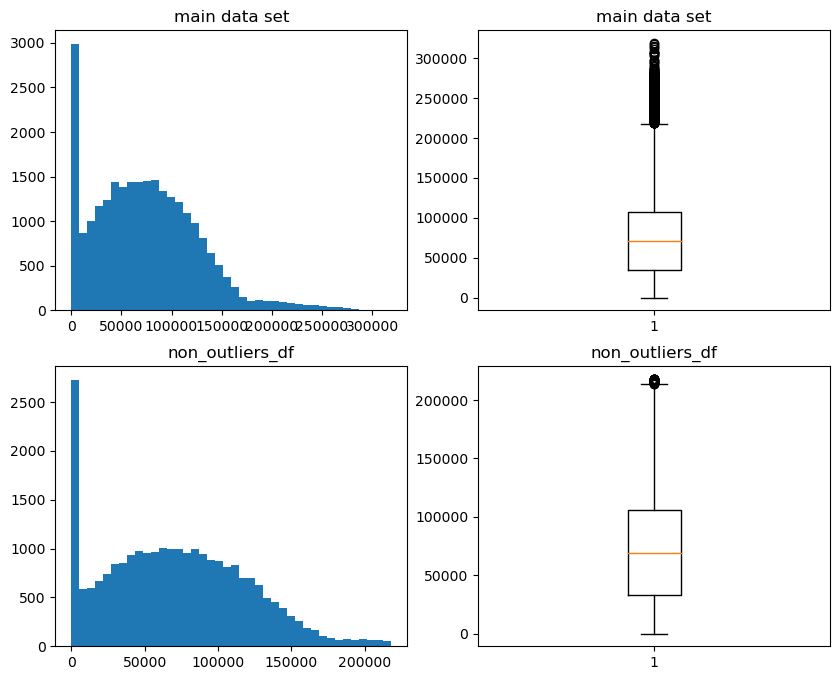

In [10]:
plt.figure(figsize=(10,8))
plt.subplot(2,2,1).hist(visa_df['prevailing_wage'],40)
plt.title('main data set')
plt.subplot(2,2,2).boxplot(visa_df['prevailing_wage'])
plt.title('main data set')
plt.subplot(2,2,3).hist(non_outliers_df['prevailing_wage'],40)
plt.title('non_outliers_df')
plt.subplot(2,2,4).boxplot(non_outliers_df['prevailing_wage'])
plt.title('non_outliers_df')
plt.show()

## how to deal outliers



**Drop the outliers**

   - we can drop the outliers if outliers precentage<2%
    
   - But this is not recommendad, we lost the other columns data also
   
**Impute with Median values**

   -  As we know that Median does not affect by outliers
    
   - so it is good practice we can impute outliers with Median Value
   
**Cap with Q3 or Q1 value**

   - if outliers are less than lower bound then fill with Q1
   - if outliers are more than upper bound then fill with Q3
    

In [11]:
# Task-3
# Read the each observation from prevailing wage
# if that observation <lb or <ub : fill with median value
# else: keep as it is


# take empty list=[]
# median = visa_df['pwage'].median()
# for i in visa_df['pwage']:
#            if i<lb or I>ub:
#                emptylist.append(median)
#            else:
#              empltylist.append(i)
#
#25480

In [12]:
empty_list=[]
median = visa_df['prevailing_wage'].median()
for i in visa_df['prevailing_wage']:
    if i<lb or i>ub:
        empty_list.append(median)
    else:
        empty_list.append(i)
len(empty_list)


25480

In [13]:
Q1,Q2,Q3

(34015.479999999996, 70308.20999999999, 107735.51250000001)

In [14]:
visa_df.describe()

,no_of_employees,yr_of_estab,prevailing_wage
count,25480.000000,25480.000000,25480.000000
mean,5667.043210,1979.409929,74455.814592
std,22877.928848,42.366929,52815.942327
min,-26.000000,1800.000000,2.136700
25%,1022.000000,1976.000000,34015.480000
50%,2109.000000,1997.000000,70308.210000
75%,3504.000000,2005.000000,107735.512500
max,602069.000000,2016.000000,319210.270000


In [15]:
Q1 = np.percentile(visa_df['prevailing_wage'],25)
Q2 = np.percentile(visa_df['prevailing_wage'],50)
Q3 = np.percentile(visa_df['prevailing_wage'],75)

In [16]:
Q1

34015.479999999996

In [17]:
visa_df.head(10)

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified
5,EZYV06,Asia,Master's,Y,N,2339,2012,South,78252.1400,Year,Y,Certified
6,EZYV07,Asia,Bachelor's,N,N,4985,1994,South,53635.3900,Year,Y,Certified
7,EZYV08,North America,Bachelor's,Y,N,3035,1924,West,418.2298,Hour,Y,Denied
8,EZYV09,Asia,Bachelor's,N,N,4810,2012,Midwest,74362.1900,Year,Y,Certified
9,EZYV10,Europe,Doctorate,Y,N,2251,1995,South,67514.7600,Year,Y,Certified


In [18]:
#hemanth code

In [19]:
visa_df['prevailing_wage']

0           592.2029
1         83425.6500
2        122996.8600
3         83434.0300
4        149907.3900
            ...     
25475     77092.5700
25476    279174.7900
25477    146298.8500
25478     86154.7700
25479     70876.9100
Name: prevailing_wage, Length: 25480, dtype: float64

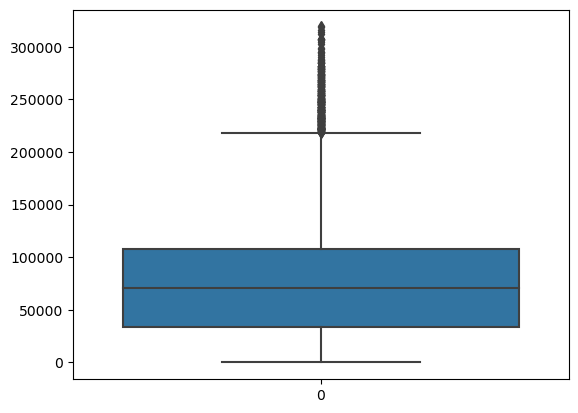

In [20]:
sns.boxplot(visa_df['prevailing_wage'])
plt.show()

In [21]:
q1=np.quantile(visa_df['prevailing_wage'],0.25)

In [22]:
q1

34015.479999999996

In [23]:
q3=np.quantile(visa_df['prevailing_wage'],0.75)

In [24]:
q3

107735.51250000001

In [25]:
IQR=q3-q1
IQR

73720.03250000002

In [26]:
lb=q1-(1.5*IQR)
lb

-76564.56875000002

In [27]:
ub=q3+(1.5*IQR)
ub

218315.56125000003

In [28]:
con1=visa_df['prevailing_wage']<lb

In [29]:
# by the below code we dont have that the outliers in the lower bound side

In [30]:
for i in con1:
    if i==False:
        print(i)

False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
Fals

In [31]:
for i in con1:
    if i==True:
        print(i)
    else:
        print("no outlier")
    break

no outlier


In [32]:
# upper bound outliers count has 427

In [33]:
con2=visa_df['prevailing_wage']>ub
out=[]
for i in con2:
    if i==True:
        out.append(i)
print(len(out))
        

427


In [34]:
con3=visa_df[con1|con2]

In [35]:
len(con3['prevailing_wage'])

427

In [36]:
#my code

In [37]:
# finding Q1,Q2,Q3 values

Q1 = np.percentile(visa_df['prevailing_wage'],25)
Q2 = np.percentile(visa_df['prevailing_wage'],50)
Q3 = np.percentile(visa_df['prevailing_wage'],75)

IQR = Q3-Q1
lb = Q1 - 1.5*IQR
ub = Q3 + 1.5*IQR

Q1,Q2,Q3,IQR,lb,ub

(34015.479999999996,
 70308.20999999999,
 107735.51250000001,
 73720.03250000002,
 -76564.56875000002,
 218315.56125000003)

In [38]:
# number of observations betweem lb and Q1 =  6370 
c1 = visa_df['prevailing_wage'] >= lb
c2 = visa_df['prevailing_wage'] < Q1
l1=len(visa_df[c1 & c2])
l1


6370

In [39]:
# number of observations between Q1 and Q2 = 
c3 = visa_df['prevailing_wage'] >= Q1
c4 = visa_df['prevailing_wage'] < Q2
l2=len(visa_df[c3 & c4])
l2

6370

In [40]:
# number of observations between Q1 and IQR = 6994
c3 = visa_df['prevailing_wage'] >= Q1
c4 = visa_df['prevailing_wage'] < IQR
l2=len(visa_df[c3 & c4])
l2

6994

In [41]:
# number of observations between Q2 and Q3 = 6370
c5 = visa_df['prevailing_wage'] >= Q2
c6 = visa_df['prevailing_wage'] < Q3
l3=len(visa_df[c5 & c6])
l3

6370

In [42]:
# number of observations between IQR and Q3 = 5746
c5 = visa_df['prevailing_wage'] >= IQR
c6 = visa_df['prevailing_wage'] < Q3
l3=len(visa_df[c5 & c6])
l3

5746

In [43]:
# number of observations between Q3 and ub = 5943
c7 = visa_df['prevailing_wage'] >= Q3
c8 = visa_df['prevailing_wage'] < ub
l4 =len(visa_df[c7 & c8])
l4

5943

In [2]:
path = r'C:\Users\kanch\OneDrive\Naresh IT\Data science\data files\Visadataset.csv'
visa_df = pd.read_csv(path)
visa_df.head(5)

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified


In [ ]:
-

In [6]:
dict1={'Name':['A','B','C','D'],'Num':[1,2,3,4]}
d=pd.DataFrame(dict1)
d

,Name,Num
0,A,1
1,B,2
2,C,3
3,D,4


In [7]:
# I want to replace num which has >2
# otherwise keep same number
l=[]
for i in d['Num']:
    if i>2:
        l.append(100)
    else: 
        l.append(d['Num'])
d['Num']=l
d

,Name,Num
0,A,"0 1 1 2 2 3 3 4 Name: Num, dtype: ..."
1,B,"0 1 1 2 2 3 3 4 Name: Num, dtype: ..."
2,C,100
3,D,100


np.where(con,True,False)

 - Will take 3 arguments
    - condition
        - con = d['Num']>2
    - True value
        - t = 100
    - False value
         - f = d['Num']

In [9]:
l= np.where(d['Num']>2,100,d['Num'])


d['Num']=l
d

Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "C:\Users\kanch\anaconda3\Lib\site-packages\IPython\core\interactiveshell.py", line 3526, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "C:\Windows\Temp\ipykernel_1216\3019455502.py", line 1, in <module>
    l= np.where(d['Num']>2,100,d['Num'])
                ^^^^^^^^^^
  File "C:\Users\kanch\anaconda3\Lib\site-packages\pandas\core\ops\common.py", line 81, in new_method
    return method(self, other)
           ^^^^^^^^^^^^^^^^^^^
  File "C:\Users\kanch\anaconda3\Lib\site-packages\pandas\core\arraylike.py", line 56, in __gt__
    return self._cmp_method(other, operator.gt)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\kanch\anaconda3\Lib\site-packages\pandas\core\series.py", line 6096, in _cmp_method
    res_values = ops.comparison_op(lvalues, rvalues, op)
                 ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\kanch\anaconda3\Lib\site-packages\pandas\core\ops\array_ops.py", line 